In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from theta import rtbm, minimizer, model, layers, gradientschemes, stopping
from theta.costfunctions import logarithmic

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import cauchy,levy

from theta.layers import ThetaUnitLayer, NormAddLayer
from theta.model import Model

# Example 1

## Generate data

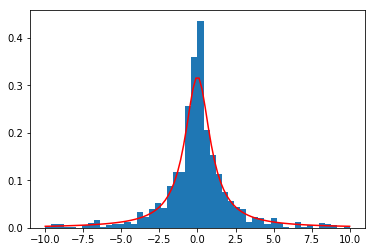

In [50]:
# simple gaussian
n = 1000
data = cauchy.rvs(loc=0, scale=1,size=n).reshape(1,n)
data = np.select([np.abs(data) < 20], data)

data = data.reshape(1,data.shape[1])

plt.hist(data.T, bins=50,range=(-10,10), normed=True);

x = np.linspace(-10,10, 100)
plt.plot(x, cauchy.pdf(x),"r-")

## Training with CMA

In [55]:
M = rtbm.RTBM(1,3, init_max_param_bound=30)

In [56]:
minim = minimizer.CMA(False)
solution = minim.train(logarithmic, M, data, tolfun=1e-5)

CMA on 1 cpu(s) enabled
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 14 (seed=248015, Fri Dec  1 12:35:06 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 1.497820094085033e+04 1.0e+00 2.81e+00  3e+00  3e+00 0:00.0
    2     22 6.216511971619694e+03 1.1e+00 2.73e+00  3e+00  3e+00 0:00.4
    3     33 5.234791491408925e+03 1.2e+00 2.67e+00  3e+00  3e+00 0:00.7
   27    297 7.912325046198008e+03 2.8e+00 2.45e+00  2e+00  3e+00 0:03.7
   64    704 2.867042285806792e+03 4.9e+00 8.46e-01  4e-01  1e+00 0:07.8
  100   1100 2.392282663804282e+03 8.8e+00 2.47e-01  9e-02  3e-01 0:11.6
  154   1694 2.317199537958926e+03 2.0e+01 1.02e-01  3e-02  1e-01 0:17.6
  200   2200 2.309924274133476e+03 4.3e+01 4.22e-02  8e-03  5e-02 0:22.6
  272   2992 2.290426759148761e+03 1.5e+02 8.58e-02  1e-02  1e-01 0:30.7
  300   3300 2.284127446280677e+03 4.1e+02 1.09e-01  1e-02  3e-01 0:33.9
  390   4290 2.277489502029510e+03 8.5e+02 9.36e-02  5e-03  3e-01 0:43.9
  400   4

In [58]:
solution

array([-5.03023172e-03,  5.33549096e-02,  6.29415235e-02, -8.22143234e-02,
       -4.67017136e+00, -3.22633369e+00,  2.82253494e+00,  9.59230932e-01,
        3.00000000e+01,  7.80849897e+00, -1.16693573e+01,  3.00000000e+01,
       -7.74754396e+00,  1.32003137e+01])

## Training with SGD

In [ ]:
M = model.Model()
M.add(layers.ThetaUnitLayer(1,1,Nhidden=3,diagonal_T=True,  init_max_param_bound=20))

In [ ]:
minim = minimizer.SGD()
solution = minim.train(logarithmic, M, data, lr=0.0001,
                       scheme=gradientschemes.adam(),  maxiter=1000)

## Testing output

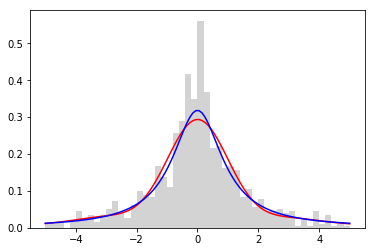

In [57]:
test_data = (np.linspace(-5,5, 100)).reshape(1, 100)
plt.hist(data.T, bins=50,range=(-5,5), normed=True, color="lightgray")
plt.plot(test_data.flatten(), M(test_data).flatten(), 'r-')
x = np.linspace(-5,5, 100)
plt.plot(x, cauchy.pdf(x),"b-")

# Example 2

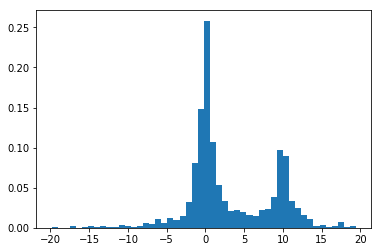

In [49]:
def cauchy_mixture(n):
    v = np.zeros(n)
    u = np.random.random_sample(n)
    for i in range(n):
        if u[i] < 0.6:
            v[i] = cauchy.rvs(loc=0, scale=1,size=1)
        elif u[i] < 0.7:
            v[i] = cauchy.rvs(loc=5, scale=5,size=1)
        else:
            v[i] = cauchy.rvs(loc=10, scale=1,size=1)
    return v


n = 1000
data = (cauchy_mixture(n)).reshape(1,n)
data = np.select([np.abs(data) < 20], data)

data = data.reshape(1,data.shape[1])

plt.hist(data.T, normed=True, bins=50);
x = np.linspace(-20,20, 100)

def p(x):
    return 0.6*cauchy.pdf(x) + 0.1*cauchy.pdf(x, loc=5, scale=5) + 0.3*cauchy.pdf(x, loc=10)

plt.plot(x, p(x),"r-")

In [37]:
mdl = Model()
mdl.add(ThetaUnitLayer(1,2,2, init_max_param_bound=50))
mdl.add(NormAddLayer(2,1))

In [38]:
minim = minimizer.CMA()
solution = minim.train(logarithmic(), mdl, data,  tolfun=1e-5)

CMA on 1 cpu(s) enabled
(6_w,12)-aCMA-ES (mu_w=3.7,w_1=40%) in dimension 20 (seed=253641, Fri Dec  1 12:20:02 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     12 1.270977125996247e+04 1.0e+00 4.81e+00  5e+00  5e+00 0:00.0
    2     24 1.406181875735856e+04 1.1e+00 4.79e+00  5e+00  5e+00 0:01.2
    3     36 2.418681883010465e+04 1.1e+00 4.72e+00  4e+00  5e+00 0:01.8
    9    108 4.899305585731751e+04 1.3e+00 4.87e+00  5e+00  5e+00 0:05.0
   18    216 5.503137840126107e+04 1.5e+00 4.35e+00  4e+00  5e+00 0:09.4
   33    396 1.285995901269376e+04 1.6e+00 2.06e+00  2e+00  2e+00 0:14.4
   56    672 9.491309070295547e+03 2.1e+00 1.48e+00  1e+00  2e+00 0:20.5
   82    984 5.883300417404977e+03 3.2e+00 1.00e+00  5e-01  1e+00 0:27.5
  100   1200 4.609499982004584e+03 3.6e+00 5.99e-01  3e-01  7e-01 0:32.2
  135   1620 3.761352696313731e+03 5.4e+00 3.65e-01  1e-01  4e-01 0:41.3
  174   2088 3.217646964535361e+03 8.1e+00 2.22e-01  6e-02  3e-01 0:51.4
  200   2

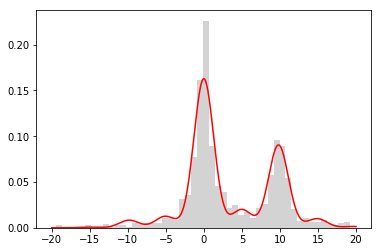

In [39]:
test_data = (np.linspace(-20,20, 1000)).reshape(1, 1000)
plt.hist(data.T, bins=50, normed=True, color="lightgray");
plt.plot(test_data.flatten(), mdl(test_data).flatten(), 'r-')
plt.plot(test_data.flatten(), p(test_data.flatten()),"b-")

In [40]:
mdl.get_layer(1).get_unit(1)._q

array([[ 6.9185045 ,  2.17334815],
       [ 2.17334815, 16.31806222]])

In [41]:
solution

array([-9.52265174e+00,  7.59255202e+00, -1.22850381e+01,  3.90832824e+00,
        1.58761030e+00,  7.27340380e+00,  6.91850450e+00,  2.17334815e+00,
        1.63180622e+01,  3.32419114e-03,  1.10841327e+00,  1.18185864e-01,
        2.79769970e+00,  3.00235019e+00,  5.90867379e-01,  2.22231089e+01,
        9.00123918e+00,  2.02721838e+01, -9.42265349e+00,  9.89798389e+00])